In [123]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns
import plotly as plt
import plotly.express as px
from plotly.io import write_html
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split
from plotly.subplots import make_subplots
import plotly.graph_objs as go
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import datetime as dt
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler

In [145]:
#TODO Opis problemu
df = pd.read_csv('weatherHistory.csv')

In [50]:
df.tail(100)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
96353,2016-09-05 20:00:00.000 +0200,Mostly Cloudy,rain,16.111111,16.111111,0.93,9.6600,240.0,9.9820,0.0,1013.41,Mostly cloudy throughout the day.
96354,2016-09-05 21:00:00.000 +0200,Mostly Cloudy,rain,15.950000,15.950000,0.93,0.5152,290.0,10.2557,0.0,1013.37,Mostly cloudy throughout the day.
96355,2016-09-05 22:00:00.000 +0200,Mostly Cloudy,rain,15.366667,15.366667,0.96,3.2039,239.0,16.0517,0.0,1013.77,Mostly cloudy throughout the day.
96356,2016-09-05 23:00:00.000 +0200,Partly Cloudy,rain,15.366667,15.366667,0.94,6.5527,281.0,15.0213,0.0,1013.96,Mostly cloudy throughout the day.
96357,2016-09-06 00:00:00.000 +0200,Partly Cloudy,rain,14.327778,14.327778,0.93,3.4293,281.0,15.7297,0.0,1013.77,Mostly cloudy starting overnight.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [51]:
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [146]:
#Zmiana formatu daty
df['Date'] = pd.to_datetime(df['Formatted Date'], utc=True)
df['Month'] = df['Date'].dt.month

In [55]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Date,Month
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,2006-03-31 22:00:00+00:00,3
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,2006-03-31 23:00:00+00:00,3
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,2006-04-01 00:00:00+00:00,4
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,2006-04-01 01:00:00+00:00,4
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,2006-04-01 02:00:00+00:00,4


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   Formatted Date            96453 non-null  object             
 1   Summary                   96453 non-null  object             
 2   Precip Type               95936 non-null  object             
 3   Temperature (C)           96453 non-null  float64            
 4   Apparent Temperature (C)  96453 non-null  float64            
 5   Humidity                  96453 non-null  float64            
 6   Wind Speed (km/h)         96453 non-null  float64            
 7   Wind Bearing (degrees)    96453 non-null  float64            
 8   Visibility (km)           96453 non-null  float64            
 9   Loud Cover                96453 non-null  float64            
 10  Pressure (millibars)      96453 non-null  float64            
 11  Daily Summary  

<Axes: xlabel='Temperature (C)', ylabel='Pressure (millibars)'>

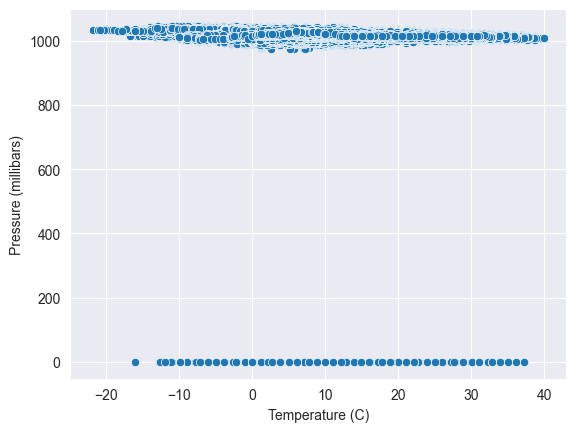

In [59]:
sns.scatterplot(df, x=df['Temperature (C)'], y=df['Pressure (millibars)'])

In [63]:
df['Pressure (millibars)'].describe()

count    96453.000000
mean      1003.235956
std        116.969906
min          0.000000
25%       1011.900000
50%       1016.450000
75%       1021.090000
max       1046.380000
Name: Pressure (millibars), dtype: float64

In [64]:
df['Temperature (C)'].describe()

count    96453.000000
mean        11.932678
std          9.551546
min        -21.822222
25%          4.688889
50%         12.000000
75%         18.838889
max         39.905556
Name: Temperature (C), dtype: float64

In [65]:
print((df['Pressure (millibars)'] == 0).sum())

1288


In [147]:
df_copy = df[df['Pressure (millibars)'] != 0]

In [138]:
df_copy.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Date,Month
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,2006-03-31 22:00:00+00:00,3
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,2006-03-31 23:00:00+00:00,3
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,2006-04-01 00:00:00+00:00,4
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,2006-04-01 01:00:00+00:00,4
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,2006-04-01 02:00:00+00:00,4


In [69]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95165 entries, 0 to 96452
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   Formatted Date            95165 non-null  object             
 1   Summary                   95165 non-null  object             
 2   Precip Type               94648 non-null  object             
 3   Temperature (C)           95165 non-null  float64            
 4   Apparent Temperature (C)  95165 non-null  float64            
 5   Humidity                  95165 non-null  float64            
 6   Wind Speed (km/h)         95165 non-null  float64            
 7   Wind Bearing (degrees)    95165 non-null  float64            
 8   Visibility (km)           95165 non-null  float64            
 9   Loud Cover                95165 non-null  float64            
 10  Pressure (millibars)      95165 non-null  float64            
 11  Daily Summary       

<Axes: xlabel='Temperature (C)', ylabel='Pressure (millibars)'>

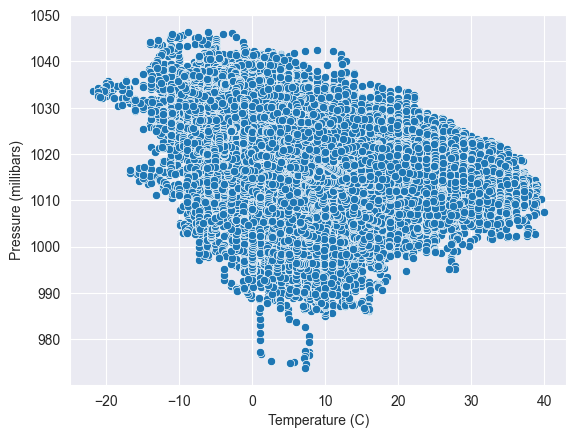

In [70]:
sns.scatterplot(df_copy, x=df_copy['Temperature (C)'], y=df_copy['Pressure (millibars)'])

In [148]:
del df_copy['Formatted Date']
del df_copy['Summary']
del df_copy['Precip Type']
del df_copy['Daily Summary']

In [149]:
df_copy = df_copy[(df_copy['Month'] >= 7) & (df_copy['Month'] <= 8)]
df_copy.info()
df_copy.head(1000)

<class 'pandas.core.frame.DataFrame'>
Index: 16233 entries, 720 to 95734
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   Temperature (C)           16233 non-null  float64            
 1   Apparent Temperature (C)  16233 non-null  float64            
 2   Humidity                  16233 non-null  float64            
 3   Wind Speed (km/h)         16233 non-null  float64            
 4   Wind Bearing (degrees)    16233 non-null  float64            
 5   Visibility (km)           16233 non-null  float64            
 6   Loud Cover                16233 non-null  float64            
 7   Pressure (millibars)      16233 non-null  float64            
 8   Date                      16233 non-null  datetime64[ns, UTC]
 9   Month                     16233 non-null  int32              
dtypes: datetime64[ns, UTC](1), float64(8), int32(1)
memory usage: 1.3 MB


,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Date,Month
720,21.016667,21.016667,0.87,3.2200,310.0,15.8263,0.0,1012.02,2006-07-31 22:00:00+00:00,7
721,19.444444,19.444444,0.90,6.0375,291.0,15.8263,0.0,1012.22,2006-07-31 23:00:00+00:00,7
722,20.722222,20.722222,0.81,9.2253,354.0,14.8764,0.0,1008.65,2006-08-01 00:00:00+00:00,8
723,18.794444,18.794444,0.93,5.9248,272.0,14.8120,0.0,1012.11,2006-08-01 01:00:00+00:00,8
724,17.733333,17.733333,0.93,3.1234,303.0,14.8120,0.0,1011.63,2006-08-01 02:00:00+00:00,8
...,...,...,...,...,...,...,...,...,...,...
3948,32.777778,32.338889,0.34,4.4758,248.0,9.9820,0.0,1020.47,2006-07-21 10:00:00+00:00,7
3949,33.866667,33.161111,0.30,2.5921,317.0,9.9820,0.0,1020.07,2006-07-21 11:00:00+00:00,7
3950,32.794444,32.811111,0.37,7.5187,241.0,11.3988,0.0,1019.75,2006-07-21 12:00:00+00:00,7
3951,33.794444,33.411111,0.32,8.9838,259.0,10.2557,0.0,1019.26,2006-07-21 13:00:00+00:00,7


In [150]:
df_copy.corr(method='pearson')

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Date,Month
Temperature (C),1.000000,0.995610,-0.833537,0.221327,-0.092733,-0.157086,NaN,-0.110231,0.008649,-0.050295
Apparent Temperature (C),0.995610,1.000000,-0.813190,0.217949,-0.093883,-0.156890,NaN,-0.115561,0.014199,-0.058283
Humidity,-0.833537,-0.813190,1.000000,-0.314259,0.041328,0.064787,NaN,-0.052266,0.061652,-0.011584
Wind Speed (km/h),0.221327,0.217949,-0.314259,1.000000,0.194707,-0.136666,NaN,-0.133063,-0.061098,-0.061267
Wind Bearing (degrees),-0.092733,-0.093883,0.041328,0.194707,1.000000,-0.033601,NaN,-0.072407,-0.061338,-0.034249
Visibility (km),-0.157086,-0.156890,0.064787,-0.136666,-0.033601,1.000000,NaN,0.114275,0.269993,0.047164
Loud Cover,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pressure (millibars),-0.110231,-0.115561,-0.052266,-0.133063,-0.072407,0.114275,NaN,1.000000,0.113409,0.065714
Date,0.008649,0.014199,0.061652,-0.061098,-0.061338,0.269993,NaN,0.113409,1.000000,0.017522
Month,-0.050295,-0.058283,-0.011584,-0.061267,-0.034249,0.047164,NaN,0.065714,0.017522,1.000000


In [80]:

df_copy.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Date,Month
0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,2006-03-31 22:00:00+00:00,3
1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,2006-03-31 23:00:00+00:00,3
2,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,2006-04-01 00:00:00+00:00,4
3,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,2006-04-01 01:00:00+00:00,4
4,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,2006-04-01 02:00:00+00:00,4


In [151]:
df_copy = df_copy.rename(columns={'Temperature (C)': 'Temp'})

In [152]:
cor = np.corrcoef((df_copy['Temp'], df_copy['Humidity']), df_copy['Pressure (millibars)'])

In [153]:
cor

array([[ 1.        , -0.83353728, -0.1102309 ],
       [-0.83353728,  1.        , -0.05226597],
       [-0.1102309 , -0.05226597,  1.        ]])

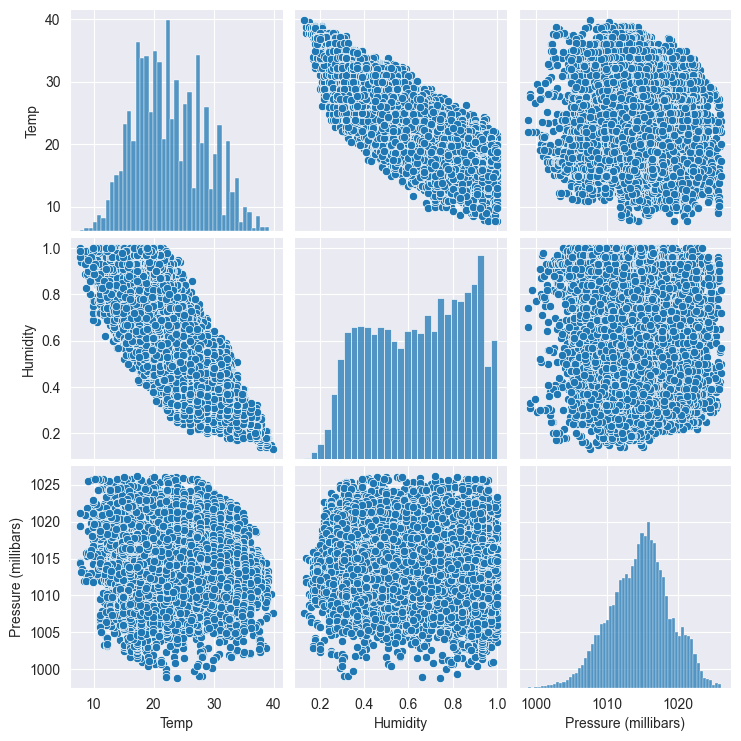

In [154]:
sns.pairplot(df_copy[['Temp', 'Humidity', 'Pressure (millibars)']])

<Axes: xlabel='Humidity', ylabel='Count'>

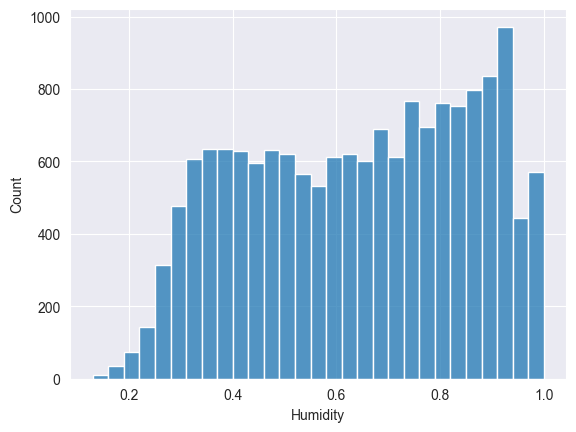

In [155]:
sns.histplot(df_copy['Humidity'])

<Axes: xlabel='Temp', ylabel='Count'>

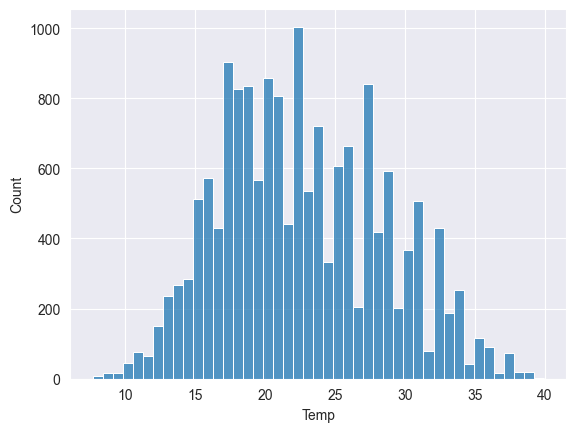

In [156]:
sns.histplot(df_copy['Temp'])

<Axes: xlabel='Pressure (millibars)', ylabel='Count'>

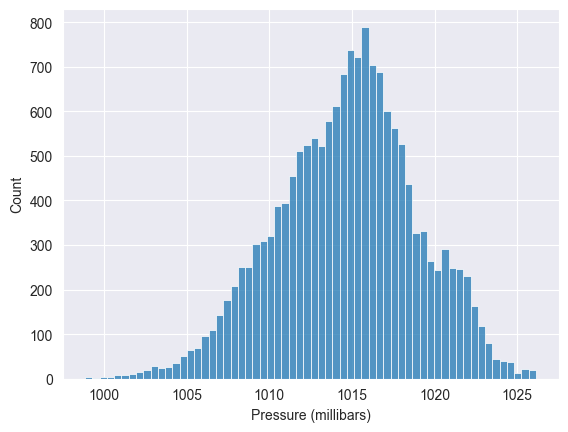

In [157]:
sns.histplot(df_copy['Pressure (millibars)'])

In [158]:
target = df_copy[['Date', 'Month','Temp', 'Humidity', 'Pressure (millibars)']]

In [159]:
target.head()

,Date,Month,Temp,Humidity,Pressure (millibars)
720,2006-07-31 22:00:00+00:00,7,21.016667,0.87,1012.02
721,2006-07-31 23:00:00+00:00,7,19.444444,0.90,1012.22
722,2006-08-01 00:00:00+00:00,8,20.722222,0.81,1008.65
723,2006-08-01 01:00:00+00:00,8,18.794444,0.93,1012.11
724,2006-08-01 02:00:00+00:00,8,17.733333,0.93,1011.63


In [160]:
target.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16233 entries, 720 to 95734
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   Date                  16233 non-null  datetime64[ns, UTC]
 1   Month                 16233 non-null  int32              
 2   Temp                  16233 non-null  float64            
 3   Humidity              16233 non-null  float64            
 4   Pressure (millibars)  16233 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(3), int32(1)
memory usage: 697.5 KB


In [161]:
target = target[target['Humidity'] > 0]

In [112]:
#Próba normalizacji danych w 'Humidity'
# humidity_not_norm = target['Humidity']
# lamba_param,_= stats.boxcox(humidity_not_norm)
# humidity_norm =(np.power(humidity_not_norm, lamba_param) - 1) / lamba_param
# print(humidity_norm)

0       -0.117241
1       -0.152309
2       -0.117241
3       -0.189047
4       -0.189047
           ...   
96448   -1.005193
96449   -0.846797
96450   -0.640956
96451   -0.554578
96452   -0.534384
Name: Humidity, Length: 95143, dtype: float64


<Axes: xlabel='Humidity', ylabel='Count'>

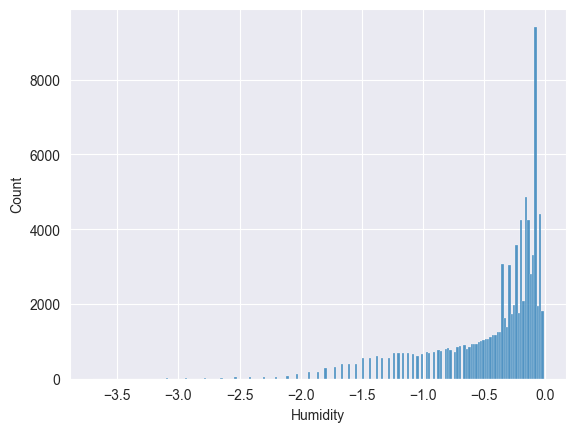

In [115]:
# sns.histplot(humidity_norm)

In [121]:
# humidity_not_norm = target['Humidity']
# humidity_norm = humidity_not_norm.transform(zscore)

<Axes: xlabel='Humidity', ylabel='Count'>

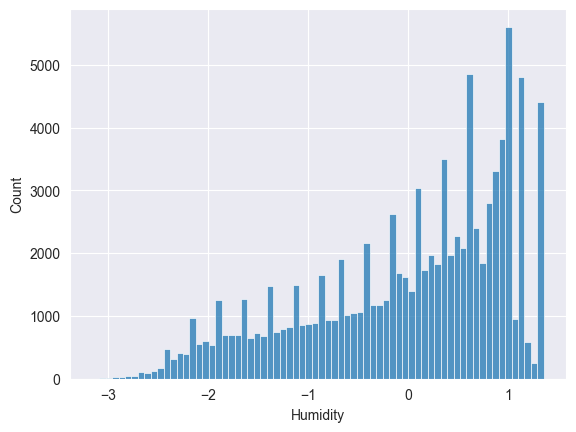

In [122]:
# sns.histplot(humidity_norm)

ValueError: Expected 2D array, got 1D array instead:
array=[0.89 0.86 0.89 ... 0.56 0.6  0.61].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.